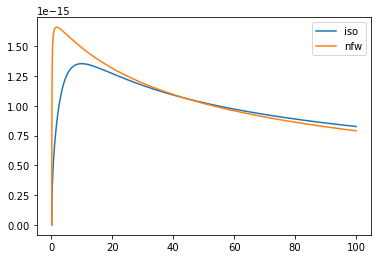

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from scipy import *
import scipy as sp

def Numerical():
    #constants
    G = (0.4)*(10**(-38)) #units: cubic-kpc / solarmass-s^2
    
    #Milky Way Properties:
    Rdisk = 15 #kpc
    hdisk = 0.3 #kpc
    
    
    
    #define R  as a linear space
    R_min = 0.1
    R_max = 100
    R_step = 10000
    R = np.linspace(R_min,R_max,R_step)
    
    
    #NFW DM density profile
    r0n = 25 #kpc
    p0n = 5*(10**6) #units: solarmass/cubic-kpc
    pNFW = p0n*(r0n/R)*((1+(R/r0n)))**(-2) #R = distance from galactic center
    
    #isothermal density profile:
    r0iso = 5 #kpc
    p0iso = 36.3*(10**6) #solar masses/cubic-kpc
    piso = p0iso/ (1 + ((R/r0iso)**2)) 
    
    J = 2*np.pi*R #The Jacodian for the integral
    
    U_NFW = J*pNFW #the integrand for NFW profile
    U_iso = J*piso #integrand for isothermal profile
    
    #Mass
    M_iso =  cumtrapz(U_iso, x=R, dx = R_step, initial = 0)
    M_NFW = cumtrapz(U_NFW, x=R, dx = R_step, initial = 0)
    
    V_iso = np.sqrt((G*M_iso)/R)
    V_NFW = np.sqrt((G*M_NFW)/R)
    #visible mass, velocity of this mass in outer regions
    #m_vis =1 #(5 * (10**43))
    #v_vis = np.sqrt((G*m_vis)/R) 
    
    #disk distribution
    #Rd = 2 #scale length of disk, kpc
    #rho_disk = Rho_0 * exp(-R/Rd) #distribution ON plane of disk
    
    #Rho_0/ ((1+(R/Rs)**2)**(3/2)) works well
    
    #Get Rho as a list
    #Rho = Rho(R,params)
    

    #print(U)
    #U_iso = J*Rho_iso
    #U_disk = J*rho_disk
    
    
    #Get the mass as a list
    #requieres an integral
    #M =  cumtrapz(U, x=R, dx = R_step, initial = 0)
    #M_iso =  cumtrapz(U_iso, x=R, dx = R_step, initial = 0)
    #M_disk = cumtrapz(U_disk, x=R, dx = R_step, initial = 0)
    #M = M(Rho,R,params)
    #print M
    
    #V = np.sqrt((G*M)/R)
    
    #V_tot = np.sqrt( (v_vis**2) + (V**2))
    
    #V_iso = np.sqrt( (G*M_iso)/R)
    
    #V_tot1 = np.sqrt( (V_iso**2) + (v_vis**2))
    
    #V_disk = np.sqrt( (G*M_disk)/R)
    
    #V_tot2 = np.sqrt( (V_iso**2) + (V_disk**2))
    
    plt.figure
    #plt.plot(R,V)
    #plt.plot(R,U)
    #plt.plot(R,M)
    
    #group 1
    #plt.plot(R,V_iso)
    #plt.plot(R,v_vis)
    #plt.plot(R,V_tot1)
    
    #plt.plot(R, V_disk)
    #plt.plot(R,V_iso)
   # plt.plot(R,V_tot2)
    #plt.legend(['disk','iso distr.','total'])
    
    #new plots
    plt.plot(R,V_iso)
    plt.plot(R,V_NFW)
    plt.legend(['iso','nfw'])
    plt.show()

if __name__ == '__Numerical__':
    Numerical()
Numerical()

In [36]:
6.67/(3.3**3)

0.18560258229679719

In [37]:
18*3


54